# REGRESIÓN LOGÍSTICA

In [106]:
import pandas as pd
import seaborn as sb

In [107]:
users = pd.read_csv("./usuarios_win_mac_lin.csv")
users.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [108]:
X = users[["paginas", "acciones"]]
y = users.clase
users.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [109]:
X = users[["paginas", "acciones"]] # "X" son siempre las variables predictoras. ogemos solo estas dos columanas, y las metemos en "X"
y = users.clase # La "y" son siempre las variables en objetivo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
from sklearn.linear_model import LogisticRegression
mrl = LogisticRegression()
mrl.fit(X_train.values, y_train.values)

LogisticRegression()

In [110]:
type(X_train.values) # nos devuleve un array multidimensional

numpy.ndarray

In [111]:
from fronteras import plot_fronteras_decision, mostrar_fronteras

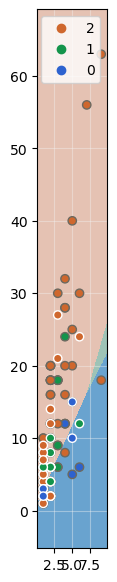

In [112]:
mostrar_fronteras(mrl, X_train.values, X_test.values, y_train, y_test, users.clase.unique())

In [113]:
users2 = pd.read_csv("./usuarios_win_mac_lin.csv")
users2 = users2[users2.clase.isin([0, 1])] # isin() "las que westan es"

In [114]:
X = users2[["paginas", "acciones"]] # "X" son siempre las variables predictoras. ogemos solo estas dos columanas, y las metemos en "X"
y = users2.clase # La "y" son siempre las variables en objetivo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
from sklearn.linear_model import LogisticRegression
mrl = LogisticRegression()
mrl.fit(X_train.values, y_train.values)

LogisticRegression()

In [115]:
from fronteras import plot_fronteras_decision, mostrar_fronteras

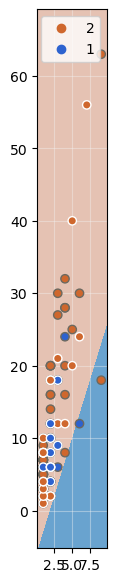

In [116]:
mostrar_fronteras(mrl, X_train.values, X_test.values, y_train, y_test, users.clase.unique())

In [117]:
users3 = pd.read_csv("./usuarios_win_mac_lin.csv")
users3 = users3[users3.clase.isin([1, 2])] # isin() "las que westan es"

In [118]:
X = users3[["paginas", "acciones"]] # "X" son siempre las variables predictoras. ogemos solo estas dos columanas, y las metemos en "X"
y = users3.clase # La "y" son siempre las variables en objetivo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
from sklearn.linear_model import LogisticRegression
mrl = LogisticRegression()
mrl.fit(X_train.values, y_train.values)

LogisticRegression()

In [119]:
from fronteras import plot_fronteras_decision, mostrar_fronteras

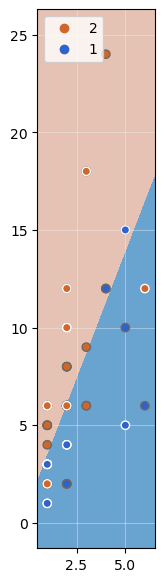

In [120]:
mostrar_fronteras(mrl, X_train.values, X_test.values, y_train, y_test, users.clase.unique())

Conclusión obtenida: La regresión logista no es un buen modelo para estos datos

# ÁRBOL DE DECISIONES

In [121]:
usersAr = pd.read_csv("./usuarios_win_mac_lin.csv")
usersAr.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [122]:
X = usersAr[["paginas", "acciones"]]
y = usersAr.clase
usersAr

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
...,...,...,...,...,...
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0


In [123]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier()
modelo.fit(X.values, y)

DecisionTreeClassifier()

In [124]:
from fronteras import plot_fronteras_decision, mostrar_fronteras

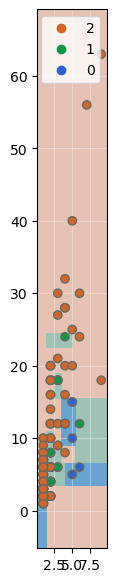

In [125]:
mostrar_fronteras(modelo, X.values, None, y, None, usersAr.clase.unique())

### Podemos visualizar el árbol de decisión usando la función plot_tree() que se encuentra en la librería "sklearn"

In [126]:
from sklearn.tree import plot_tree

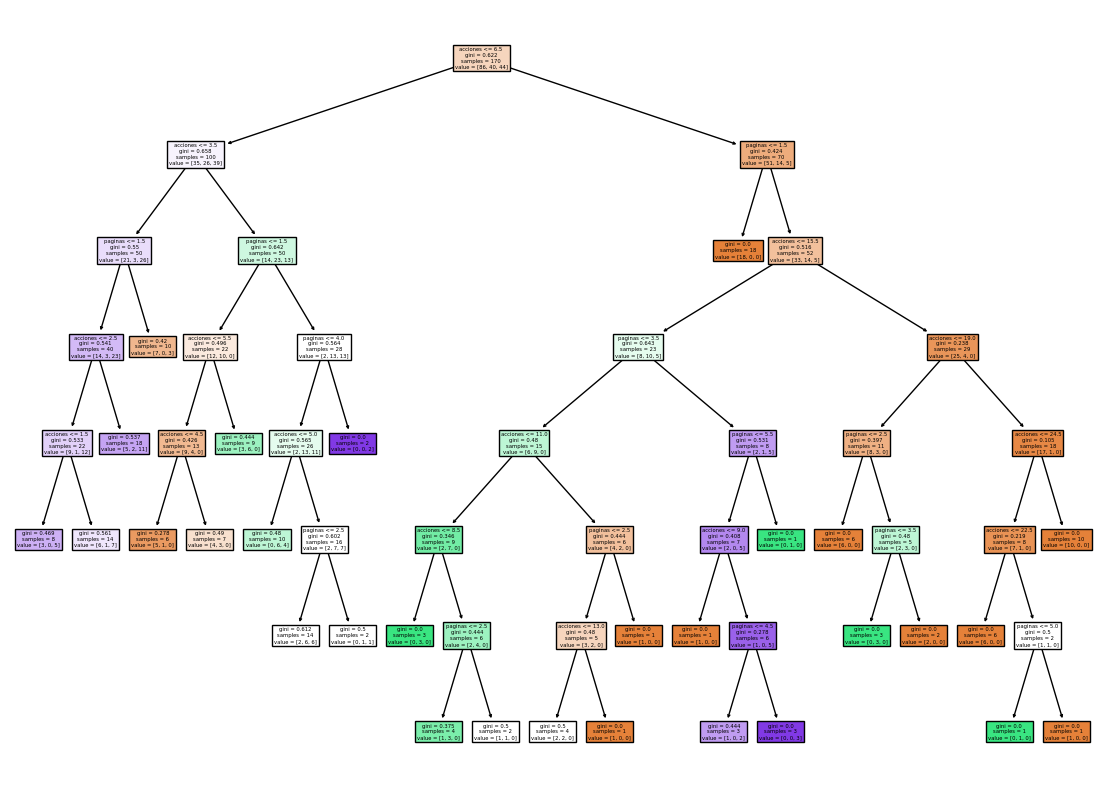

In [127]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (14, 10))
plot_tree(modelo, filled = True, feature_names = X.columns)
plt.show()

### Vamos a limitar la profundidad máximo del árbol

In [131]:
model = DecisionTreeClassifier(max_depth = 15, random_state = 0)
model.fit(X.values, y)

DecisionTreeClassifier(max_depth=15, random_state=0)

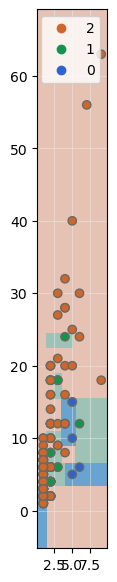

In [134]:
mostrar_fronteras(model, X.values, None, y, None, usersAr.clase.unique())

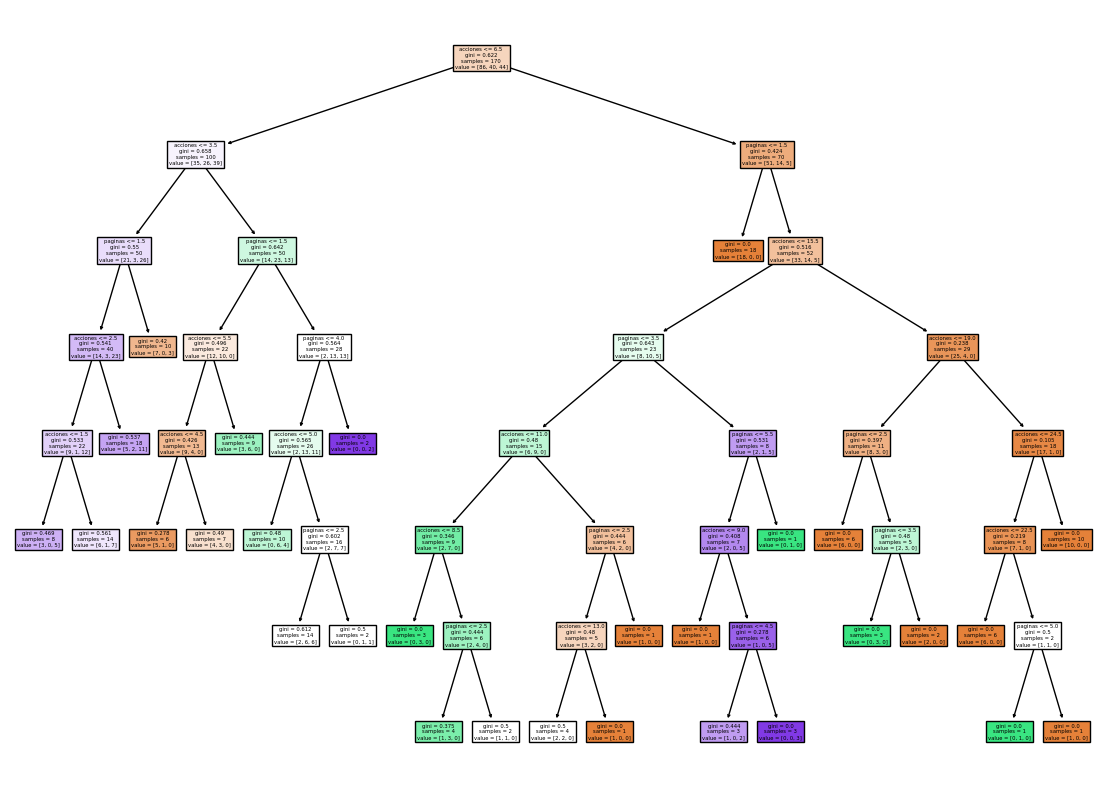

In [135]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (14, 10))
plot_tree(modelo, filled = True, feature_names = X.columns)
plt.show()

### Vamos a ver la exactitud (número de muestrass bvien clasificadas) del modelo


In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [137]:
model2 = DecisionTreeClassifier(max_depth = 3, random_state = 42) # el random_state es la "SEMILLA" (buscar el cincepto en google)
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [138]:
model2.score(X_test, y_test)

0.5116279069767442

In [139]:
Xtest4 = X_test.iloc[[3]]
Xtest4

,paginas,acciones
30,2,4


In [140]:
model.predict(Xtest4)

C:\Users\72478072N\AppData\Local\anaconda3\envs\CursoIA\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([1], dtype=int64)

In [141]:
model2.predict_proba(Xtest4)

array([[0.05263158, 0.42105263, 0.52631579]])

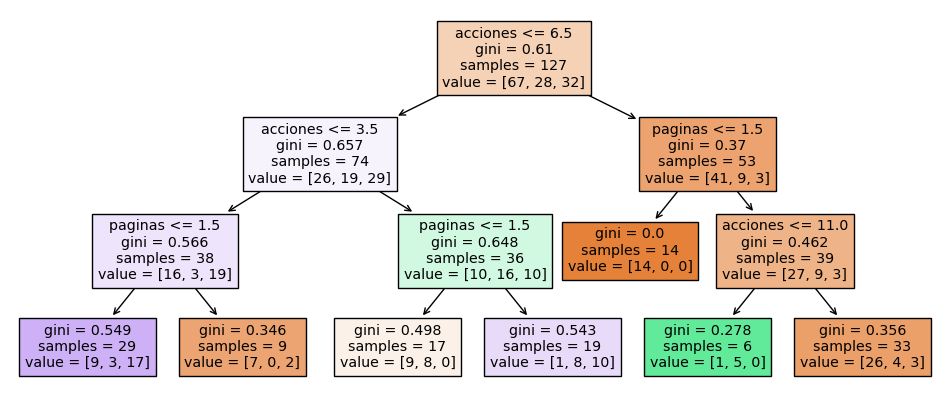

In [142]:
fig, ax = plt.subplots(figsize = (12, 5))
plot_tree(model2, filled = True, feature_names = X_test.columns)
plt.show()

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [155]:
train_scores = []
test_scores = []
for depth in range(1, 16): # Hacemos un bucles para crear niveles
    model = DecisionTreeClassifier(max_depth = depth)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

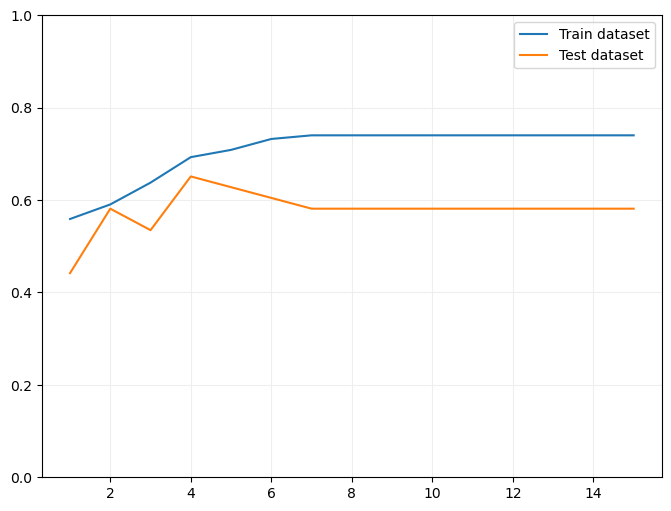

In [156]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(range(1, 16), train_scores, label = "Train dataset")
ax.plot(range(1, 16), test_scores, label = "Test dataset")
ax.grid(color = "#EEEEEE", zorder = 0)
ax.set_ylim(0,1)
ax.legend()
plt.show()